# 1 Multiclass Classification

## 1.1 Dataset 

In [575]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import json
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

In [450]:
data_path = '/Users/Jonathan/Documents/Coursera/ML/machine-learning-ex3/ex3/'
fname = 'ex3data1.mat'

data = loadmat(data_path+fname)
data

{'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [451]:
X = np.array(data.get('X'))
y = data.get('y').reshape(1, -1)[0]

y[y==10] = 0

In [452]:
X.shape # 5000 training examples of 20x20 pixel grids

(5000, 400)

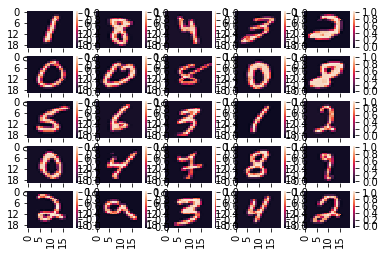

In [251]:
fig, axes = plt.subplots(5, 5)

for i in range(5):
    for j in range(5):
        sns.heatmap(X[np.random.randint(0, len(y)), :].reshape([20, 20], order='F'), ax=axes[i, j] )

In [252]:
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

## 1.3 Vectorizing Logistic Regression
### 1.3.1 Vectorizing the Cost Function

In [348]:
def lrCostFunction(theta, X, y, Lambda):
    """ 
        LRCOSTFUNCTION Compute cost  for logistic regression with regularization
        J = LRCOSTFUNCTION(theta, X, y, lambda) computes the cost of using
        theta as the parameter for regularized logistic regression and the
        gradient of the cost w.r.t. to the parameters. 
    """
    # Initialize some useful values
    m = len(y); # number of training examples
    n = len(theta)
    mask = np.ones(n)
    mask[0] = 0
    
    # Calculate h(theta) or yhat
    yhat = sigmoid(X.dot(theta))
    reg = Lambda * np.sum((theta**2).dot(mask)) / 2
    
    # Calculate cost function
    J = (-np.log(yhat).dot(y) - np.log(1-yhat).dot(1-y) + reg ) / m
    
    return J

In [349]:
n = X.shape[1]
theta = np.zeros(n)

In [351]:
lrCostFunction(theta, X, y, 0.01)

160.39425758157174

## Vectorizing the Gradient

In [361]:
def lrGradient(theta, X, y, Lambda):
    """ 
        LRCOSTFUNCTION Compute gradient for logistic regression with 
        regularization
        J = LRCOSTFUNCTION(theta, X, y, lambda) computes the cost of using
        theta as the parameter for regularized logistic regression and the
        gradient of the cost w.r.t. to the parameters. 
    """
    
    # Initialize some useful values
    m = len(y)
    n = len(theta)
    mask = np.ones(n)
    mask[0] = 0
    
    # Calculate h(theta) or yhat
    yhat = sigmoid(X.dot(theta))

    # Calculate gradient
    grad = (yhat - y).dot(X)
    
    # Regularization term. 0 for first element
    reg = Lambda * theta * mask

    grad = (grad + reg) / m
    
    return grad

In [363]:
lrGradient(theta, X, y, 0.01)[0:15] 

array([ 0.00000000e+00,  0.00000000e+00, -7.74530186e-08,  3.19876600e-06,
        1.89536237e-05, -7.06376094e-04, -8.97395355e-04, -3.72741263e-04,
       -1.10787541e-04, -1.37049401e-04, -4.11905416e-05,  3.09307938e-05,
        7.56273049e-05,  1.66101324e-04,  1.88959823e-04])

#### ============ Part 2a: Vectorize Logistic Regression ============
  In this part of the exercise, you will reuse your logistic regression
  code from the last exercise. You task here is to make sure that your
  regularized logistic regression implementation is vectorized. After
  that, you will implement one-vs-all classification for the handwritten
  digit dataset.

In [364]:
# Test case for lrCostFunction
print('\nTesting lrCostFunction() with regularization');

theta_t = np.array([-2, -1, 1, 2]);
X_t = np.column_stack([np.ones(5).transpose() , np.arange(1, 16).reshape(5,3, order='F')/10])
#X_t = np.column_stack([X_t, np.arange(1, 16).reshape(5,3)/10] );
y_t = np.array([1,0,1,0,1]) >= 0.5;
lambda_t = 3;
J = lrCostFunction(theta_t, X_t, y_t, lambda_t);
grad = lrGradient(theta_t, X_t, y_t, lambda_t);


Testing lrCostFunction() with regularization


In [365]:
np.column_stack([np.ones(5).transpose() , np.arange(1, 16).reshape(5,3, order='F')/10])

array([[1. , 0.1, 0.6, 1.1],
       [1. , 0.2, 0.7, 1.2],
       [1. , 0.3, 0.8, 1.3],
       [1. , 0.4, 0.9, 1.4],
       [1. , 0.5, 1. , 1.5]])

In [368]:
print('\nCost: {}'.format(J));
print('Expected cost: 2.534819\n');
print('Gradients:');
print(' {} \n'.format(grad));
print('Expected gradients:');
print('[ 0.146561 -0.548558 0.724722 1.398003 ]\n');


Cost: 2.534819396109744
Expected cost: 2.534819

Gradients:
 [ 0.14656137 -0.54855841  0.72472227  1.39800296] 

Expected gradients:
[ 0.146561 -0.548558 0.724722 1.398003 ]



## 1.4 One-vs-all Classification

###### Using scipy.optimize.fmin (fminunc in matlab)

In [380]:
from scipy.optimize import fmin, fmin_bfgs
from sklearn.preprocessing import OneHotEncoder

In [443]:
Lambda = 0.1;
input_layer_size  = 400;  # 20x20 Input Images of Digits
num_labels = 10;          # 10 labels, from 1 to 10

In [447]:
def oneVsAll(X, y, num_labels, Lambda, fit_intercept=True):
    """
    ONEVSALL trains multiple logistic regression classifiers and returns all
    the classifiers in a matrix all_theta, where the i-th row of all_theta 
    corresponds to the classifier for label i
    
       [all_theta] = ONEVSALL(X, y, num_labels, lambda) trains num_labels
       logistic regression classifiers and returns each of these classifiers
       in a matrix all_theta, where the i-th row of all_theta corresponds 
       to the classifier for label i
       
       fit_intercept will add the intercept terms to the input array if not present. Default: True
    """
    
    # Useful variables
    m = X.shape[0]
    
    # Add intercept terms if fit_intercept is true
    if fit_intercept == True:
        X = np.column_stack((np.ones(m), X))
        
    n = X.shape[1]
    theta_all = np.zeros((num_labels,n))    
    
    for c in range(num_labels):
        print(c)
        y_c = (y == c)
        
        theta_all[c, :] = fmin_bfgs(lrCostFunction, x0=theta_all[c, :], args=(X, y_c, Lambda))
        #theta_all[c, :] = fmin(lrCostFunction, x0=theta_all[c, :], args=(X, y_c, Lambda))
        
    return theta_all

Training One-vs-All Logistic Regression

In [453]:
theta_opt = oneVsAll(X, y, num_labels, Lambda, True)

0
Optimization terminated successfully.
         Current function value: 0.008583
         Iterations: 288
         Function evaluations: 116467
         Gradient evaluations: 289
1
Optimization terminated successfully.
         Current function value: 0.013128
         Iterations: 286
         Function evaluations: 115661
         Gradient evaluations: 287
2
Optimization terminated successfully.
         Current function value: 0.050810
         Iterations: 439
         Function evaluations: 177320
         Gradient evaluations: 440
3
Optimization terminated successfully.
         Current function value: 0.057612
         Iterations: 424
         Function evaluations: 171275
         Gradient evaluations: 425
4
Optimization terminated successfully.
         Current function value: 0.033075
         Iterations: 396
         Function evaluations: 159991
         Gradient evaluations: 397
5
Optimization terminated successfully.
         Current function value: 0.054466
         Iteration

In [460]:
theta_opt

array([[-8.04971541e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.49978503e-04,  5.73194337e-06,  0.00000000e+00],
       [-3.05743235e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.43934136e-03, -7.06558124e-08,  0.00000000e+00],
       [-3.72271450e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.08745151e-02, -2.33755710e-03,  0.00000000e+00],
       ...,
       [-2.28334655e+00,  0.00000000e+00, -2.27976966e-08, ...,
        -5.75710308e-03,  6.75366667e-04,  0.00000000e+00],
       [-9.12793322e+00,  0.00000000e+00, -1.93774717e-08, ...,
        -5.29832922e-04,  5.50716707e-05,  0.00000000e+00],
       [-5.62785919e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.11627729e-02,  8.56918426e-04,  0.00000000e+00]])

###### Using gradient descent (do this another time)

### 1.4.1 One-vs-all Prediction

In [571]:
def predictOneVsAll(all_theta, X):
    """    
    PREDICT Predict the label for a trained one-vs-all classifier. The labels 
    are in the range 1..K, where K = size(all_theta, 1). 
      p = PREDICTONEVSALL(all_theta, X) will return a vector of predictions
      for each example in the matrix X. Note that X contains the examples in
      rows. all_theta is a matrix where the i-th row is a trained logistic
      regression theta vector for the i-th class. You should set p to a vector
      of values from 1..K (e.g., p = [1; 3; 1; 2] predicts classes 1, 3, 1, 2
      for 4 examples) 
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0];

    # Add ones to the X data matrix
    X = np.column_stack((np.ones(m), X));
    
    # Calculate probability of number being in each class
    yhat = sigmoid(X.dot(all_theta.transpose()))
    
    # Convert this to the expected value based on maximum
    p = np.array(pd.DataFrame(yhat).idxmax(1))

    
    return p

In [533]:
p = predictOneVsAll(theta_opt, X)

In [535]:
p

array([0, 0, 0, ..., 9, 9, 7])

What does visualizing the weights look like?

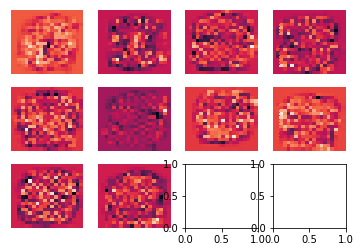

In [569]:
fig, axes = plt.subplots(3, 4)

k = 0
for i in range(3):
    for j in range(4): 
        if k < 10:
            sns.heatmap(theta_opt[k, 1:].reshape(20, 20, order='F'),
                        ax=axes[i, j], cbar=False, xticklabels=False, yticklabels=False)
            k = k+1


Not much!:)

In [540]:
print(theta_opt.shape)
print(X.shape)

(10, 401)
(5000, 400)


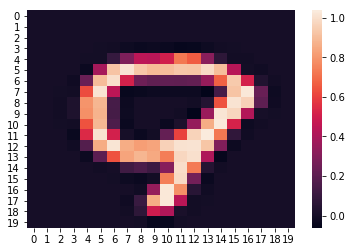

In [570]:
# From above the final number is incorrect. Inspect why...
sns.heatmap(X[4999, :].reshape(20, 20, order='F'))

In [557]:
print('accuracy = {}%'.format(np.mean(p == y)*100))

accuracy = 96.48%


Testing on the training set so is expected to be high...
Obviously need to set up train/test split

# 2. Neural Networks
## 2.1 Model Representation

In [599]:
# Load saved matrices from file
ex3weights = loadmat(data_path+'ex3weights.mat');
# The matrices Theta1 and Theta2 will now be in your python environment
# Theta1 has size 25 x 401
# Theta2 has size 10 x 26


input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)

data = loadmat(data_path+'ex3data1.mat');
X = data.get('X')
y = data.get('y').flatten()
m = X.shape[0];
theta1 = ex3weights.get('Theta1')
theta2 = ex3weights.get('Theta2')


In [609]:
def addInterceptCol(X):
    """
    Prepends column of ones to feature array.
    """
    
    return np.column_stack((np.ones(X.shape[0]), X))

In [612]:
# Add inctercept terms...
X_ = addInterceptCol(X)

In [654]:
print(theta1.shape)
print(X_.shape)

print(theta2.shape)

(25, 401)
(5000, 401)
(10, 26)


In [653]:
def predict(Theta1, Theta2, X):
    """
    PREDICT Predict the label of an input given a trained neural network
       p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
       trained weights of a neural network (Theta1, Theta2)
    """
    # Useful values
    m = X.shape[0];
    num_labels = Theta2.shape[0];

    
    # Theta1 and Theta2 are weights for layer 1 and layer 2 respectively.
    # Need to calculate activations for layer 1, which are fed into layer 2
    activation1 = addInterceptCol(sigmoid(X.dot(Theta1.transpose()))) # activations from first layer 
    activation2 = sigmoid(activation1.dot(Theta2.transpose()))
    
    # Index starts from 0, so add 1. Take mod 10 to return 10 to 0.
    p = (pd.DataFrame(activation2).idxmax(1) + 1) % 10

    return p

In [656]:
pred = predict(theta1, theta2, X_)

In [659]:
print('\nTraining Set Accuracy: {}\n'.format(np.mean(pred == (y%10))* 100));


Training Set Accuracy: 97.52



2


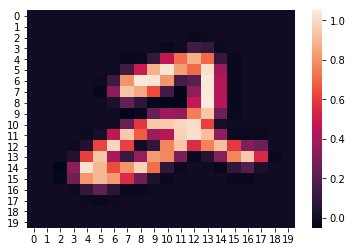

In [701]:
test_i = 1000

sns.heatmap(X[test_i, :].reshape(20, 20, order='F'))
print(pred[test_i])